In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
data = pd.read_csv('Datasets/owid-covid-data.csv')

In [3]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31-12-2019,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
44991,NaN,NaN,International,16-09-2020,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44992,NaN,NaN,International,17-09-2020,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44993,NaN,NaN,International,18-09-2020,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44994,NaN,NaN,International,19-09-2020,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44995,NaN,NaN,International,20-09-2020,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(44996, 41)

In [6]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.439300e+04,44192.000000,43410.000000,44393.000000,44192.000000,43410.000000,44128.000000,44128.000000,43345.000000,44128.000000,...,39625.000000,26444.000000,40153.000000,41559.000000,31499.000000,31102.000000,18750.000000,36304.000000,44170.000000,38737.000000
mean,9.466538e+04,1395.543175,1378.986970,3909.847634,43.346760,43.362335,1793.395413,23.677295,23.282704,55.618874,...,20972.019607,12.037328,251.369006,8.048940,10.832122,32.637045,52.565345,3.114953,74.049867,0.725508
std,9.804426e+05,12722.823174,12478.357311,36447.719036,366.543653,356.304793,3840.443818,72.351346,55.811612,141.022583,...,20462.500710,19.164406,117.613212,4.143619,10.481674,13.409506,31.581434,2.530083,7.365134,0.152685
min,0.000000e+00,-8261.000000,-552.000000,0.000000,-1918.000000,-232.143000,0.000000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,5.400000e+01,0.000000,0.571000,0.000000,0.000000,0.000000,25.883000,0.000000,0.125000,0.000000,...,5338.454000,0.500000,155.898000,5.310000,1.900000,21.400000,21.222000,1.300000,69.910000,0.606000
50%,9.470000e+02,10.000000,14.214500,18.000000,0.000000,0.143000,267.251000,1.484000,2.858000,4.604500,...,14103.452000,1.800000,238.339000,7.110000,6.400000,31.400000,55.182000,2.500000,75.490000,0.755000
75%,1.011100e+04,157.000000,161.821250,215.000000,3.000000,3.000000,1796.430250,16.663250,18.332000,33.907500,...,32415.132000,16.000000,318.949000,10.180000,19.600000,40.900000,83.741000,4.200000,79.930000,0.853000
max,3.083592e+07,314271.000000,289831.000000,957790.000000,10491.000000,7456.714000,42743.296000,4944.376000,882.924000,1237.551000,...,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [7]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [8]:
data.nunique()

iso_code                             211
continent                              6
location                             212
date                                 265
total_cases                        16322
new_cases                           3956
new_cases_smoothed                  8533
total_deaths                        5605
new_deaths                          1037
new_deaths_smoothed                 2231
total_cases_per_million            28364
new_cases_per_million              15597
new_cases_smoothed_per_million     17910
total_deaths_per_million           14445
new_deaths_per_million              2973
new_deaths_smoothed_per_million     3659
new_tests                           9370
total_tests                        15433
total_tests_per_thousand           12784
new_tests_per_thousand              2811
new_tests_smoothed                 10483
new_tests_smoothed_per_thousand     2806
tests_per_case                     14397
positive_rate                        529
tests_units     

In [9]:
country = data.location.unique()
print(country)
print(country.size)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus'
 'Czech Republic' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Faeroe Islands'
 'Falkland Islands' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland'
 'Grenada' 'Guam' 'Guatemala

In [18]:
# Receives date and column of interest for every country as a dataframe
def scatter_plot(date, col1, col2):
    tot = pd.DataFrame(columns = ['date', 'location', col1, col2])
    for c in country:
        temp = data[(data['location']==c) & (data['date']==date)][['date', 'location', col1, col2]]
        tot = tot.append(temp, ignore_index = True).fillna(0)
    tot.set_index('date', inplace=True)
    
    fig = px.scatter(tot, x=col2, y=col1, color="location", trendline="ols", hover_data=['location'])
    fig.show()
    
    return tot

scatter_plot('20-09-2020', 'total_deaths_per_million', 'median_age')

,location,total_deaths_per_million,median_age
date,,,
20-09-2020,Afghanistan,37.017,18.6
20-09-2020,Albania,124.401,38.0
20-09-2020,Algeria,37.969,29.1
20-09-2020,Andorra,685.951,0.0
20-09-2020,Angola,4.381,16.8
...,...,...,...
20-09-2020,Yemen,19.647,20.3
20-09-2020,Zambia,17.896,17.7
20-09-2020,Zimbabwe,15.138,19.6


### Check general situation of any country

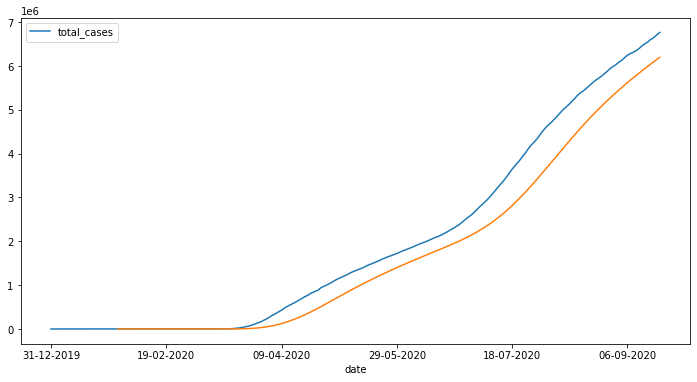

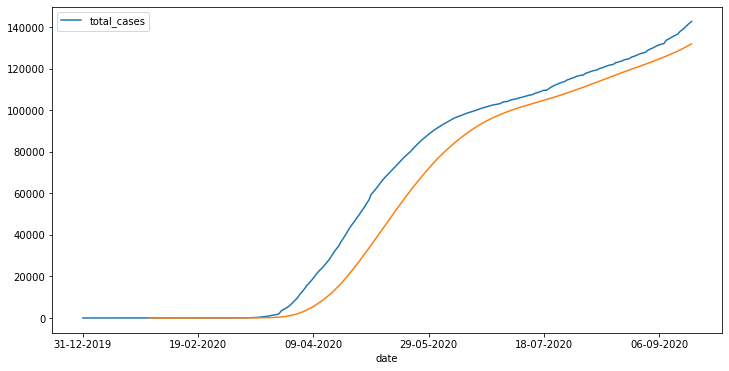

In [27]:
def plot_general_situation(country, col):
    indexer = data[data['location']==country].index
    country_total_cases = data.loc[indexer, 'date': col]
    country_total_cases = country_total_cases.dropna()
    country_total_cases.set_index('date', inplace=True)
    country_total_cases.plot(figsize=(12,6))
    country_total_cases.rolling(window=30).mean()[col].plot() # Good if orange < blue

plot_general_situation('United States', 'total_cases')
plot_general_situation('Canada', 'total_cases')

### Checking the efficiency of lockdowns

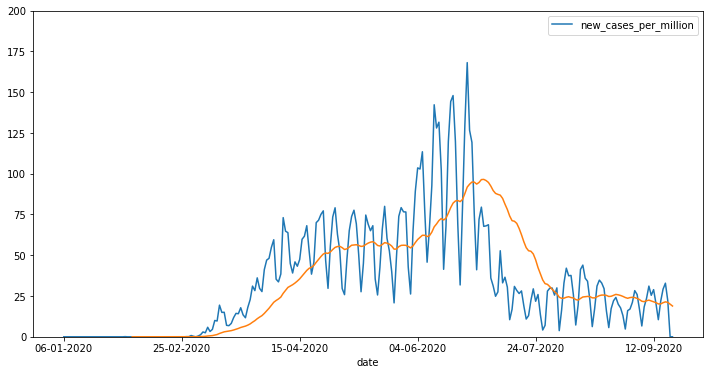

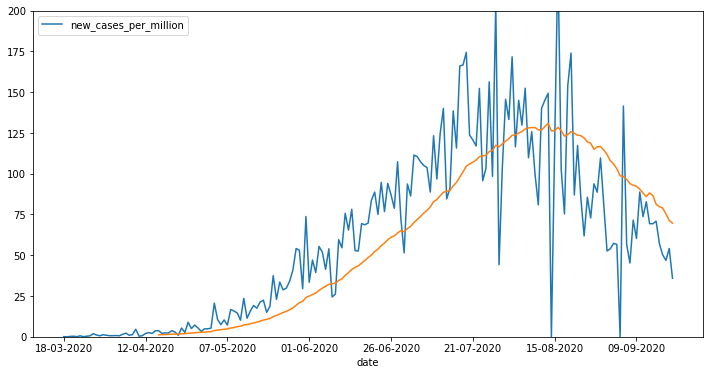

In [24]:
def plot_covid_data(country, col, plot_ma=False, y_max=200):
    indexer = data[data['location']==country].index
    country = data.loc[indexer, 'date':col]
    country = country.dropna()
    country.set_index('date', inplace=True)
    country.drop(country.columns.difference([col]), 1, inplace=True)
    country.plot(figsize=(12,6), ylim=[0,y_max])
    if plot_ma:
        country.rolling(window=30).mean()[col].plot()
    
# Min Restriction
plot_covid_data('Sweden', 'new_cases_per_million', True)
# Max Restriction
plot_covid_data('Bolivia', 'new_cases_per_million', True) 

## Checking the influence of other parameters

### Obesity effect on death rate

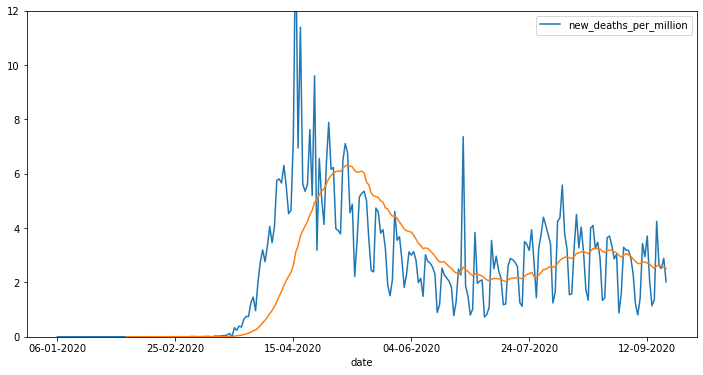

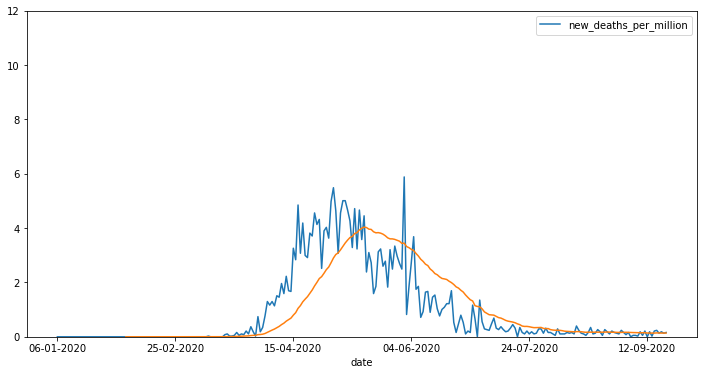

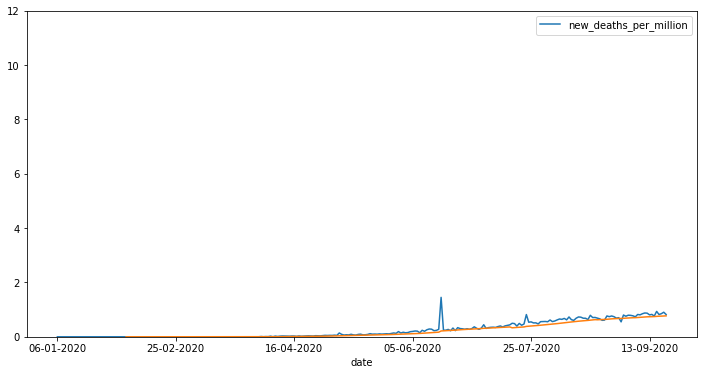

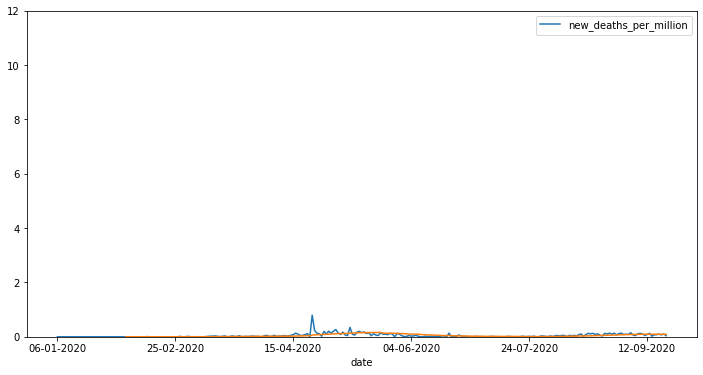

In [34]:
# Countries with highest percentages 
plot_covid_data('United States', 'new_deaths_per_million', True, 12)
plot_covid_data('Canada', 'new_deaths_per_million', True, 12)
# Countries with lowest percentages
plot_covid_data('India', 'new_deaths_per_million', True, 12)
plot_covid_data('Japan', 'new_deaths_per_million', True, 12)

### Diabetes effect on death rate

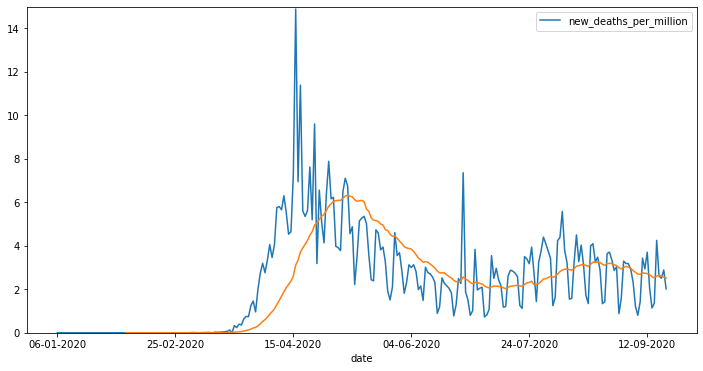

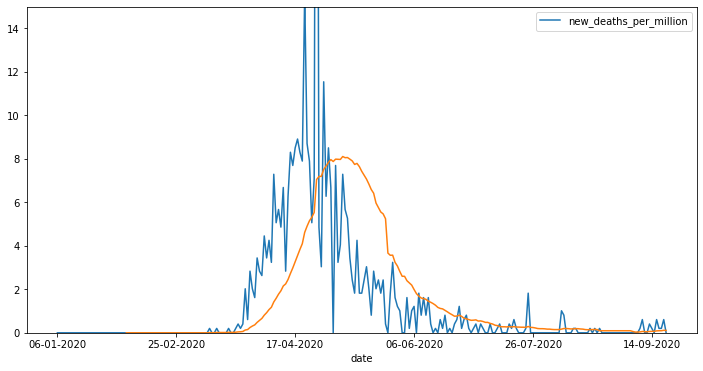

In [35]:
# Country with highest percentage 
plot_covid_data('United States', 'new_deaths_per_million', True, 15)
# Country with lowest percentage
plot_covid_data('Ireland', 'new_deaths_per_million', True, 15)

### Testing effect on death rate

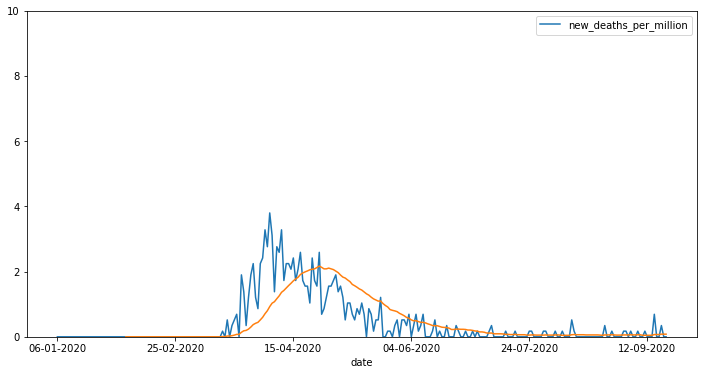

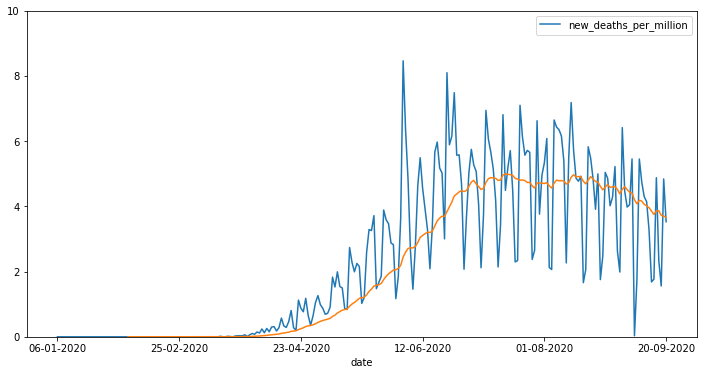

In [36]:
# Country with highest percentage 
plot_covid_data('Denmark', 'new_deaths_per_million', True, 10)
# Country with lowest percentage
plot_covid_data('Mexico', 'new_deaths_per_million', True, 10)

### Median Age effect on death rate

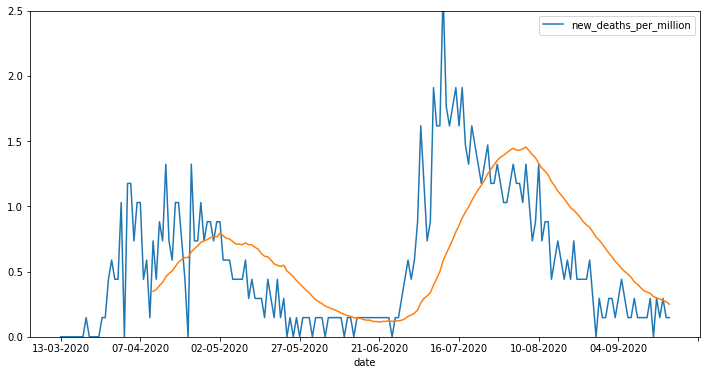

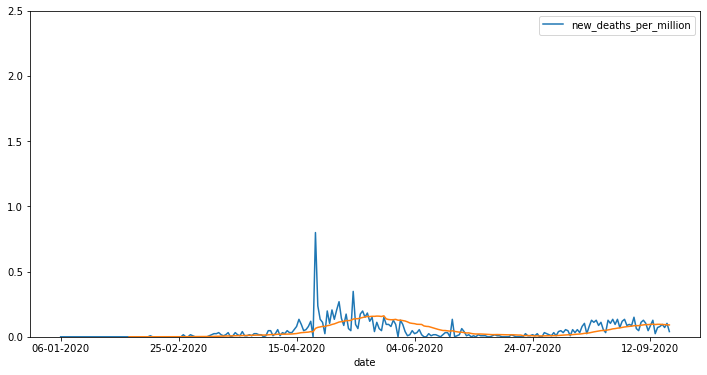

In [37]:
# Country with lowest median age
plot_covid_data('Serbia', 'new_deaths_per_million', True, 2.5)
# Country with highest median age
plot_covid_data('Japan', 'new_deaths_per_million', True, 2.5)